In [2]:
import numpy as np
import nbformat as nbf
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.colors as pc

In [3]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Read the Vestiaire dataset into a dataframe
vestiaire_df = pd.read_csv('datasets/vestiaire_smaller.csv')

# Display the Head of the Data Frame
print(f"This data frame contains {len(vestiaire_df)} rows.")
vestiaire_df.head(3)



This data frame contains 13736 rows.


,product_id,product_type,product_name,product_gender_target,product_category,product_season,product_condition,product_like_count,sold,brand_name,product_material,product_color,price_usd,seller_price,seller_earning,buyers_fees,seller_id,seller_country,seller_products_sold,seller_num_products_listed
0,43247626,Wool mini skirt,Wool mini skirt Miu Miu Grey size S Internatio...,Women,Women Clothing,Autumn / Winter,Never worn,34,True,Miu Miu,Wool,Grey,272.92,223.65,216.94,NaN,25775970,Germany,3,14
1,43246247,Wool suit jacket,Wool suit jacket Dior Grey size 40 FR in Wool,Women,Women Clothing,Autumn / Winter,Very good condition,2,True,Dior,Wool,Grey,437.97,358.91,312.25,NaN,2709130,Italy,172,6
2,43246087,Silk maxi dress,Silk maxi dress La Perla Black size 44 IT in S...,Women,Women Clothing,All seasons,"Never worn, with tag",4,True,La Perla,Silk,Black,444.74,370.62,322.44,NaN,6048767,Germany,5,15


In [5]:
# Display the Tail of the Data Frame
vestiaire_df.tail(3)


,product_id,product_type,product_name,product_gender_target,product_category,product_season,product_condition,product_like_count,sold,brand_name,product_material,product_color,price_usd,seller_price,seller_earning,buyers_fees,seller_id,seller_country,seller_products_sold,seller_num_products_listed
13733,41503237,Tweed trainers,Tweed trainers Chanel Black size 39 EU in Tweed,Women,Women Shoes,All seasons,Never worn,24,True,Chanel,Tweed,Black,447.90,373.25,324.73,NaN,3180346,Italy,11,1
13734,41540832,Leather heels,Leather heels Pollini Black size 38 IT in Leat...,Women,Women Shoes,All seasons,Never worn,2,True,Pollini,Leather,Black,51.12,42.60,28.76,NaN,19750106,Italy,62,184
13735,41540732,Leather heels,Leather heels Ninamounah Black size 39 EU in L...,Women,Women Shoes,All seasons,Very good condition,21,True,Ninamounah,Leather,Black,97.13,80.94,80.94,NaN,5992355,Estonia,1,1


In [6]:
# Examine the rows and columns count
vestiaire_df.shape

(13736, 20)

# Data Cleaning

In [7]:
vestiaire_clean = vestiaire_df.copy()

In [8]:
vestiaire_clean.columns

Index(['product_id', 'product_type', 'product_name', 'product_gender_target',
       'product_category', 'product_season', 'product_condition',
       'product_like_count', 'sold', 'brand_name', 'product_material',
       'product_color', 'price_usd', 'seller_price', 'seller_earning',
       'buyers_fees', 'seller_id', 'seller_country', 'seller_products_sold',
       'seller_num_products_listed'],
      dtype='object')

In [9]:
vestiaire_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13736 entries, 0 to 13735
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  13736 non-null  int64  
 1   product_type                13736 non-null  object 
 2   product_name                13736 non-null  object 
 3   product_gender_target       13736 non-null  object 
 4   product_category            13727 non-null  object 
 5   product_season              13736 non-null  object 
 6   product_condition           13736 non-null  object 
 7   product_like_count          13736 non-null  int64  
 8   sold                        13736 non-null  bool   
 9   brand_name                  13736 non-null  object 
 10  product_material            13736 non-null  object 
 11  product_color               13736 non-null  object 
 12  price_usd                   13736 non-null  float64
 13  seller_price                137

In [10]:
vestiaire_clean.drop(columns=['buyers_fees'], inplace=True)

In [11]:
(vestiaire_clean.isna().mean() * 100).sum()

0.06552125800815375

In [12]:
vestiaire_clean.isna().mean() * 100

product_id                    0.000000
product_type                  0.000000
product_name                  0.000000
product_gender_target         0.000000
product_category              0.065521
product_season                0.000000
product_condition             0.000000
product_like_count            0.000000
sold                          0.000000
brand_name                    0.000000
product_material              0.000000
product_color                 0.000000
price_usd                     0.000000
seller_price                  0.000000
seller_earning                0.000000
seller_id                     0.000000
seller_country                0.000000
seller_products_sold          0.000000
seller_num_products_listed    0.000000
dtype: float64

In [13]:
vestiaire_clean = vestiaire_clean.dropna(subset=['product_category'])

In [14]:
vestiaire_clean.isna().mean() * 100

product_id                    0.0
product_type                  0.0
product_name                  0.0
product_gender_target         0.0
product_category              0.0
product_season                0.0
product_condition             0.0
product_like_count            0.0
sold                          0.0
brand_name                    0.0
product_material              0.0
product_color                 0.0
price_usd                     0.0
seller_price                  0.0
seller_earning                0.0
seller_id                     0.0
seller_country                0.0
seller_products_sold          0.0
seller_num_products_listed    0.0
dtype: float64

# Exploratory Data Analysis

In [15]:
gender_count = vestiaire_clean['product_gender_target'].value_counts()

fig_gender = go.Figure(data=[go.Pie(labels=gender_count.index, values=gender_count.values, 
                             hoverinfo='label+value', textinfo='percent',
                             textfont_size=20, marker=dict( 
                             line=dict(color='#000000', width=2)))])

fig_gender.update_layout(title_text='Gender Distribution of Buyers', title_font_size=24)

In [16]:
# Get the HTML string for the Plotly graph
plotly_gender_html = fig_gender.to_html(full_html=False, include_plotlyjs='cdn')

# Save the Plotly graph as an HTML file
file_path = "plotly_gender_graph.html"
try:
    with open(file_path, "w") as file:
        file.write(plotly_gender_html)
    print(f"Plotly graph saved as {file_path}")
except IOError as e:
    print(f"Error saving Plotly graph: {e}")

Plotly graph saved as plotly_gender_graph.html


In [17]:
# Aggregate the data to get the count of sellers per country
seller_counts = vestiaire_clean['seller_country'].value_counts().reset_index()
seller_counts.columns = ['country', 'seller_count']

# Create a list of Countries with Sellers
country_list = seller_counts['country'].tolist()
print(country_list)
print(len(country_list))


['Italy', 'France', 'United Kingdom', 'Germany', 'United States', 'Spain', 'Poland', 'Romania', 'Sweden', 'Greece', 'Bulgaria', 'Netherlands', 'Belgium', 'Austria', 'Portugal', 'Australia', 'Hong Kong', 'Ireland', 'Denmark', 'Lithuania', 'Switzerland', 'Finland', 'Latvia', 'Croatia', 'Czech Republic', 'Hungary', 'Monaco', 'Cyprus', 'Slovakia', 'Canada', 'Luxembourg', 'Singapore', 'Estonia', 'Slovenia', 'Japan', 'United Arab Emirates', 'Malaysia', 'South Korea', 'Philippines', 'Malta', 'Turkey', 'China', 'Qatar', 'Kazakhstan', 'Lebanon', 'Israel', 'Indonesia', 'Bahrain', 'Norway', 'Saudi Arabia', 'New Zealand']
51


In [18]:
# Read the CSV file containing country coordinates
country_coords_file = pd.read_csv('datasets\country_coords.csv')

# Filter the DataFrame to only include countries in country_list
filtered_coords_df = country_coords_file[country_coords_file['country'].isin(country_list)]

# Create the dictionary
country_coords = {
    row['country']: {'lat': row['lat'], 'lon': row['lon']}
    for _, row in filtered_coords_df.iterrows()
}

# Display the resulting dictionary
print(country_coords)

# Check if the lengths match
if len(country_coords) == len(country_list):
    print("The lengths match!")
else:
    print(f"The lengths do not match. Dictionary length: {len(country_coords)}, List length: {len(country_list)}")

{'United Arab Emirates': {'lat': 23.424076, 'lon': 53.847818}, 'Austria': {'lat': 47.516231, 'lon': 14.550072}, 'Australia': {'lat': -25.274398, 'lon': 133.775136}, 'Belgium': {'lat': 50.503887, 'lon': 4.469936}, 'Bulgaria': {'lat': 42.733883, 'lon': 25.48583}, 'Bahrain': {'lat': 25.930414, 'lon': 50.637772}, 'Canada': {'lat': 56.130366, 'lon': -106.346771}, 'Switzerland': {'lat': 46.818188, 'lon': 8.227512}, 'China': {'lat': 35.86166, 'lon': 104.195397}, 'Cyprus': {'lat': 35.126413, 'lon': 33.429859}, 'Czech Republic': {'lat': 49.817492, 'lon': 15.472962}, 'Germany': {'lat': 51.165691, 'lon': 10.451526}, 'Denmark': {'lat': 56.26392, 'lon': 9.501785}, 'Estonia': {'lat': 58.595272, 'lon': 25.013607}, 'Spain': {'lat': 40.463667, 'lon': -3.74922}, 'Finland': {'lat': 61.92411, 'lon': 25.748151}, 'France': {'lat': 46.227638, 'lon': 2.213749}, 'United Kingdom': {'lat': 55.378051, 'lon': -3.435973}, 'Greece': {'lat': 39.074208, 'lon': 21.824312}, 'Hong Kong': {'lat': 22.396428, 'lon': 114.109

In [19]:
# Create the Coordinate DataFrame
coords_df = pd.DataFrame.from_dict(country_coords, orient='index').reset_index()
coords_df.columns = ['country', 'lat', 'lon']

# Merge the data
seller_location_data = pd.merge(seller_counts, coords_df, on='country')

In [20]:
# Create Bubble Map
fig_seller_loc = px.scatter_geo(
    seller_location_data,
    lat='lat',
    lon='lon',
    size='seller_count',
    hover_name='country',
    size_max=50,
    projection="natural earth",
    title='Seller Locations on Vestiaire Platform'
)


In [21]:
# Get the HTML string for the Plotly graph
plotly_seller_loc_html = fig_seller_loc.to_html(full_html=False, include_plotlyjs='cdn')

# Save the Plotly graph as an HTML file (optional)
with open("plotly_graph.html", "w") as file:
    file.write(plotly_seller_loc_html)

## Russell's Visualizations and Transformations

### Seasonal sales of products by material

In [22]:
#Gathering and Formatting the Data
clothing_df = vestiaire_clean[vestiaire_clean['product_category'].isin(['Women Clothing', 'Men Clothing'])]

#The Cloth material doesnt make much sense as many of the materials are cloth so I am removing it from our count. (That material only occured a few times in the spring/summer season anyway so we wont lose much data.)
clothing_df = clothing_df[clothing_df['product_material'] != 'Cloth']

#Counting the quantity of clothing sold for each material
seasonal_materials_df = clothing_df.groupby(['product_season', 'product_material']).size().reset_index(name='count')

seasonal_materials_df.head()

,product_season,product_material,count
0,All seasons,Alligator,1
1,All seasons,Cashmere,1
2,All seasons,Cotton,2640
3,All seasons,Cotton - elasthane,136
4,All seasons,Crocodile,1


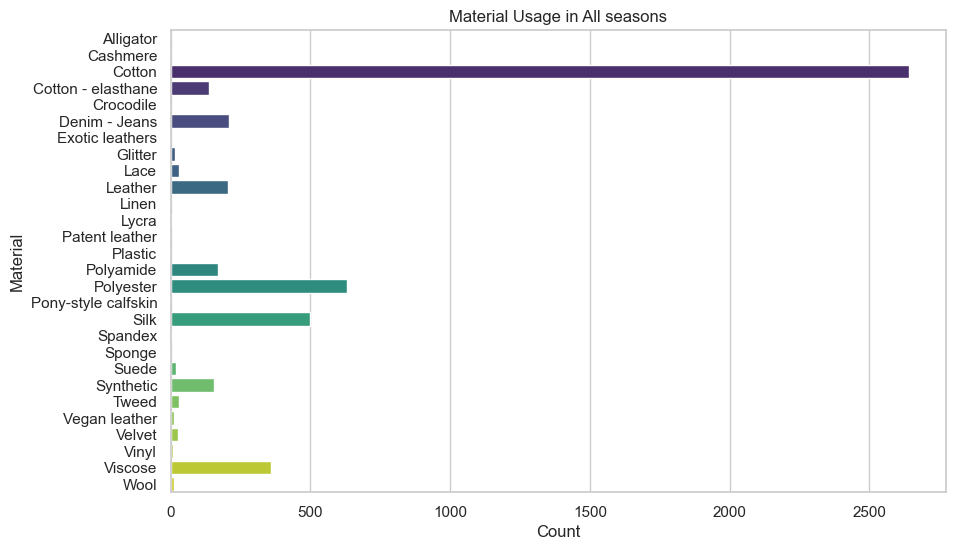

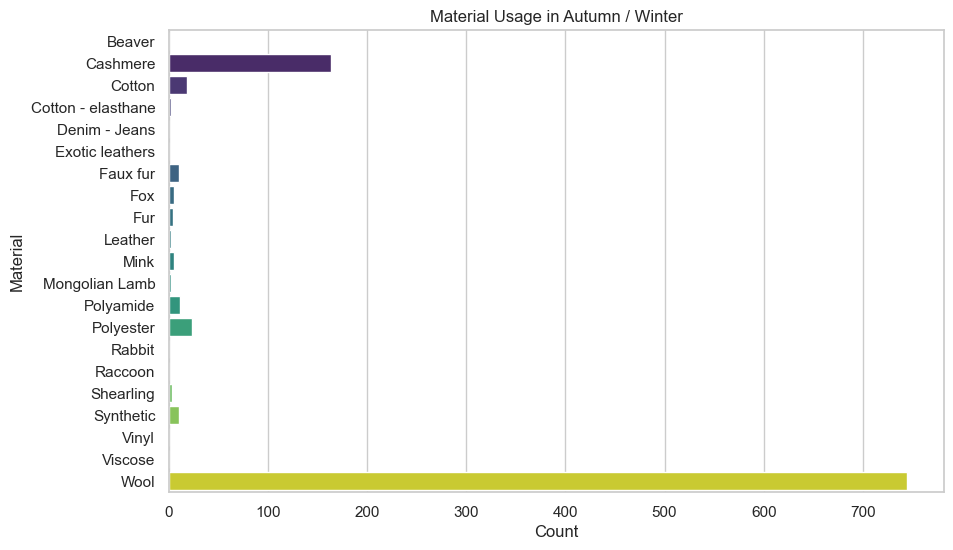

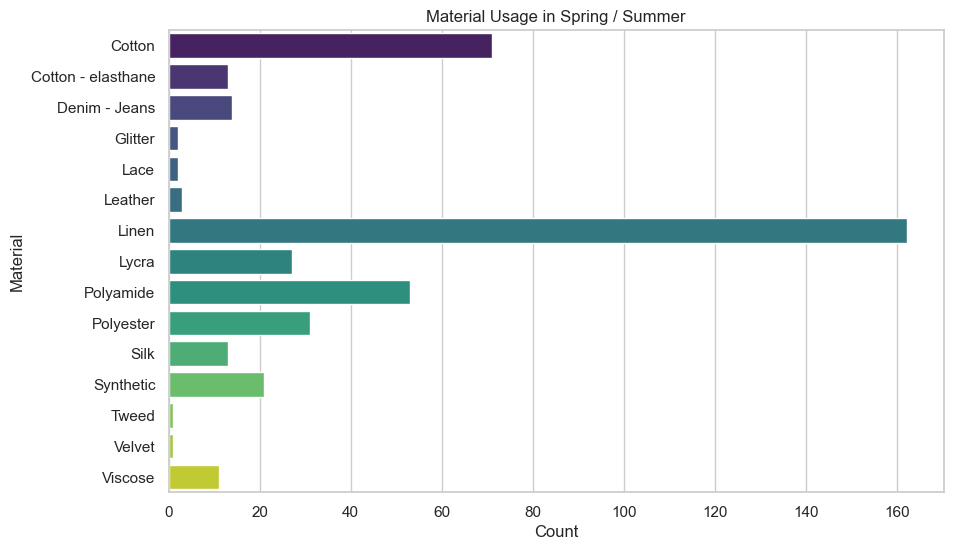

In [23]:
# Set the style for the plots
sns.set(style="whitegrid")

# List of seasons
seasons = ['All seasons', 'Autumn / Winter', 'Spring / Summer']

# Create a bar plot for each season
for season in seasons:
    plt.figure(figsize=(10, 6))
    season_data = seasonal_materials_df[seasonal_materials_df['product_season'] == season]
    sns.barplot(x='count', y='product_material', data=season_data, palette='viridis')
    plt.title(f'Material Usage in {season}')
    plt.xlabel('Count')
    plt.ylabel('Material')
    plt.show()

**Annalysis**\
We can see that it is best to sell Wool in the Autumn/Winter, Linen in the Spring/Summer, and of course Cotton is popular in any season.

### Untitled Price/Margin Visualization

In [24]:
# Ensure the DataFrame contains the necessary columns
if 'price_usd' in vestiaire_clean.columns and 'seller_earning' in vestiaire_clean.columns:
    # Calculate the percentage of profit
    vestiaire_clean['profit_percentage'] = (vestiaire_clean['seller_earning'] / vestiaire_clean['price_usd']) * 100

    # Handle potential division by zero errors by replacing infinities with NaN
    vestiaire_clean['profit_percentage'].replace([float('inf'), -float('inf')], float('nan'), inplace=True)
else:
    print("The DataFrame does not contain the necessary columns 'price_usd' and 'seller_earning'.")

display(vestiaire_clean.head())
display(vestiaire_clean.tail())

,product_id,product_type,product_name,product_gender_target,product_category,product_season,product_condition,product_like_count,sold,brand_name,product_material,product_color,price_usd,seller_price,seller_earning,seller_id,seller_country,seller_products_sold,seller_num_products_listed,profit_percentage
0,43247626,Wool mini skirt,Wool mini skirt Miu Miu Grey size S Internatio...,Women,Women Clothing,Autumn / Winter,Never worn,34,True,Miu Miu,Wool,Grey,272.92,223.65,216.94,25775970,Germany,3,14,79.488495
1,43246247,Wool suit jacket,Wool suit jacket Dior Grey size 40 FR in Wool,Women,Women Clothing,Autumn / Winter,Very good condition,2,True,Dior,Wool,Grey,437.97,358.91,312.25,2709130,Italy,172,6,71.294838
2,43246087,Silk maxi dress,Silk maxi dress La Perla Black size 44 IT in S...,Women,Women Clothing,All seasons,"Never worn, with tag",4,True,La Perla,Silk,Black,444.74,370.62,322.44,6048767,Germany,5,15,72.500787
3,43244097,Trousers,Trousers Gucci Beige size M International in C...,Women,Women Clothing,All seasons,Very good condition,4,True,Gucci,Cotton,Beige,145.75,119.44,103.91,10050555,Spain,11,15,71.293310
4,43246432,Lingerie set,Lingerie set Agent Provocateur Black in Polyam...,Women,Women Clothing,All seasons,Very good condition,0,True,Agent Provocateur,Polyamide,Black,55.37,46.14,42.40,5594414,United Kingdom,47,13,76.575763


,product_id,product_type,product_name,product_gender_target,product_category,product_season,product_condition,product_like_count,sold,brand_name,product_material,product_color,price_usd,seller_price,seller_earning,seller_id,seller_country,seller_products_sold,seller_num_products_listed,profit_percentage
13731,41542694,Heels,Heels Prada Brown size 37 IT in Suede,Women,Women Shoes,All seasons,Good condition,7,True,Prada,Suede,Brown,29.16,24.30,10.07,22898175,Switzerland,179,44,34.533608
13732,41540056,Simple pump patent leather heels,Simple pump patent leather heels Christian Lou...,Women,Women Shoes,All seasons,Very good condition,3,True,Christian Louboutin,Patent leather,Black,332.28,276.90,276.90,16266013,France,1,0,83.333333
13733,41503237,Tweed trainers,Tweed trainers Chanel Black size 39 EU in Tweed,Women,Women Shoes,All seasons,Never worn,24,True,Chanel,Tweed,Black,447.90,373.25,324.73,3180346,Italy,11,1,72.500558
13734,41540832,Leather heels,Leather heels Pollini Black size 38 IT in Leat...,Women,Women Shoes,All seasons,Never worn,2,True,Pollini,Leather,Black,51.12,42.60,28.76,19750106,Italy,62,184,56.259781
13735,41540732,Leather heels,Leather heels Ninamounah Black size 39 EU in L...,Women,Women Shoes,All seasons,Very good condition,21,True,Ninamounah,Leather,Black,97.13,80.94,80.94,5992355,Estonia,1,1,83.331617


In [25]:
#Cutting down the data to only neccessary columns
profit_df = vestiaire_clean[['product_name', 'brand_name', 'product_season', 'price_usd', 'seller_earning', 'profit_percentage', 'product_color']]

# Sort the DataFrame by 'profit_percentage' in descending order
profit_df = profit_df.sort_values(by='profit_percentage', ascending=False)

# Reset the index of the sorted DataFrame
profit_df = profit_df.reset_index(drop=True)

profit_df = profit_df[(profit_df['profit_percentage'] != 100) & (profit_df['profit_percentage'] != 0)]

# Display the head and tail of the sorted DataFrame
display(profit_df.head())
display(profit_df.tail())

,product_name,brand_name,product_season,price_usd,seller_earning,profit_percentage,product_color
8,Leather purse Louis Vuitton Brown in Leather,Louis Vuitton,All seasons,200.00,194.00,97.000000,Brown
9,Leather mules & clogs Gucci Black size 37 EU i...,Gucci,All seasons,129.00,125.13,97.000000,Black
10,Leather biker jacket Burberry Green size 8 UK ...,Burberry,All seasons,171.00,165.87,97.000000,Green
11,Sunglasses Dita Black in Plastic,Dita,All seasons,354.00,343.38,97.000000,Black
12,101801 wool coat Max Mara Camel size 0 US in W...,Max Mara,Autumn / Winter,1227.27,1190.45,96.999845,Camel


,product_name,brand_name,product_season,price_usd,seller_earning,profit_percentage,product_color
13713,Top Saint James Multicolour size XS Internatio...,Saint James,All seasons,22.39,2.22,9.915141,Multicolour
13714,T,Katie Eary,All seasons,25.44,2.49,9.787736,Multicolour
13715,Leather high trainers Pierre Hardy Black size ...,Pierre Hardy,All seasons,50.00,4.39,8.780000,Black
13716,Sunglasses Dolce & Gabbana Grey in Plastic,Dolce & Gabbana,All seasons,67.81,5.94,8.759770,Grey
13717,Scarf Burberry Multicolour in Cotton,Burberry,Autumn / Winter,62.70,1.74,2.775120,Multicolour


In [51]:
top_profit_margins = profit_df.head(20)
bottom_profit_margins = profit_df.tail(20)

display(top_profit_margins)
display(bottom_profit_margins)

,product_name,brand_name,product_season,price_usd,seller_earning,profit_percentage,product_color
8,Leather purse Louis Vuitton Brown in Leather,Louis Vuitton,All seasons,200.00,194.00,97.000000,Brown
9,Leather mules & clogs Gucci Black size 37 EU i...,Gucci,All seasons,129.00,125.13,97.000000,Black
10,Leather biker jacket Burberry Green size 8 UK ...,Burberry,All seasons,171.00,165.87,97.000000,Green
11,Sunglasses Dita Black in Plastic,Dita,All seasons,354.00,343.38,97.000000,Black
12,101801 wool coat Max Mara Camel size 0 US in W...,Max Mara,Autumn / Winter,1227.27,1190.45,96.999845,Camel
13,Leather biker jacket Michael Kors Black size M...,Michael Kors,All seasons,107.90,104.66,96.997220,Black
14,Corset Roberto Cavalli Black size 38 IT in Pol...,Roberto Cavalli,All seasons,66.52,60.48,90.920024,Black
15,Slim jean Versace Black size 31 US in Cotton,Versace,All seasons,70.00,63.64,90.914286,Black
16,Sweatshirt Versace Navy size L International i...,Versace,All seasons,70.00,63.64,90.914286,Navy
17,Leather ankle boots Prada Beige size 41 EU in ...,Prada,All seasons,180.00,163.64,90.911111,Beige


,product_name,brand_name,product_season,price_usd,seller_earning,profit_percentage,product_color
13698,T,Nuna Lie,All seasons,21.73,4.26,19.604234,Black
13699,Shirt Just Cavalli Multicolour size XXL Intern...,Just Cavalli,All seasons,25.75,4.99,19.378641,Multicolour
13700,Linen trousers Massimo Dutti Blue size 44 FR i...,Massimo Dutti,Spring / Summer,20.90,4.00,19.138756,Blue
13701,Cloth high trainers Saint Laurent Black size 3...,Saint Laurent,All seasons,84.47,15.98,18.917959,Black
13702,Blouse Sandro Beige size S International in Co...,Sandro,All seasons,24.29,3.93,16.179498,Beige
13703,Shirt Erika Cavallini Brown size 42 IT in Cotton,Erika Cavallini,All seasons,20.45,3.20,15.647922,Brown
13704,Sr1 patent leather heels Sergio Rossi Black si...,Sergio Rossi,All seasons,20.79,3.20,15.392015,Black
13705,Silk tie Armand Thiery Navy in Silk,Armand Thiery,All seasons,20.79,3.20,15.392015,Navy
13706,Silk tie Valentino Garavani Blue in Silk,Valentino Garavani,All seasons,20.79,3.20,15.392015,Blue
13707,Leather trainers Pinko White size 39 EU in Lea...,Pinko,All seasons,19.80,3.00,15.151515,White


In [55]:
fig = px.scatter(top_profit_margins, 
                 x="price_usd",
                 y="profit_percentage",
                 size="seller_earning",  # Size of the bubbles
                 color="product_season",    # Color of the bubbles
                 hover_name="product_name", # Hover information
                 log_x=True,                # Log scale for x-axis
                 size_max=60)               # Maximum size of the bubbles

# Display the chart
fig.show()

In [56]:
fig = px.scatter(bottom_profit_margins, 
                 x="price_usd",
                 y="profit_percentage",
                 size="seller_earning",  # Size of the bubbles
                 color="product_season",    # Color of the bubbles
                 hover_name="product_name", # Hover information
                 log_x=True,                # Log scale for x-axis
                 size_max=60)               # Maximum size of the bubbles

# Display the chart
fig.show()

# TEST CODE #

In [ ]:
np.random.seed(1)

x = np.random.rand(100)
y = np.random.rand(100)

f = go.FigureWidget([go.Scatter(x=x, y=y, mode='markers')])

scatter = f.data[0]
colors = ['#a3a7e4'] * 100
scatter.marker.color = colors
scatter.marker.size = [10] * 100
f.layout.hovermode = 'closest'


# create our callback function
def update_point(trace, points, selector):
    c = list(scatter.marker.color)
    s = list(scatter.marker.size)
    for i in points.point_inds:
        c[i] = '#bae2be'
        s[i] = 20
        with f.batch_update():
            scatter.marker.color = c
            scatter.marker.size = s


scatter.on_click(update_point)

f

In [ ]:
# Initialize figure
fig = go.Figure()

# Add Traces

fig.add_trace(
    go.Scatter(x=list(df.Date),
               y=list(df.High),
               name="High",
               line=dict(color="#33CFA5")))

fig.add_trace(
    go.Scatter(x=list(df.Date),
               y=[df.High.mean()] * len(df.index),
               name="High Average",
               visible=False,
               line=dict(color="#33CFA5", dash="dash")))

fig.add_trace(
    go.Scatter(x=list(df.Date),
               y=list(df.Low),
               name="Low",
               line=dict(color="#F06A6A")))

fig.add_trace(
    go.Scatter(x=list(df.Date),
               y=[df.Low.mean()] * len(df.index),
               name="Low Average",
               visible=False,
               line=dict(color="#F06A6A", dash="dash")))

# Add Annotations and Buttons
high_annotations = [dict(x="2016-03-01",
                         y=df.High.mean(),
                         xref="x", yref="y",
                         text="High Average:<br> %.3f" % df.High.mean(),
                         ax=0, ay=-40),
                    dict(x=df.Date[df.High.idxmax()],
                         y=df.High.max(),
                         xref="x", yref="y",
                         text="High Max:<br> %.3f" % df.High.max(),
                         ax=-40, ay=-40)]
low_annotations = [dict(x="2015-05-01",
                        y=df.Low.mean(),
                        xref="x", yref="y",
                        text="Low Average:<br> %.3f" % df.Low.mean(),
                        ax=0, ay=40),
                   dict(x=df.Date[df.High.idxmin()],
                        y=df.Low.min(),
                        xref="x", yref="y",
                        text="Low Min:<br> %.3f" % df.Low.min(),
                        ax=0, ay=40)]

fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=list([
                dict(label="None",
                     method="update",
                     args=[{"visible": [True, False, True, False]},
                           {"title": "Yahoo",
                            "annotations": []}]),
                dict(label="High",
                     method="update",
                     args=[{"visible": [True, True, False, False]},
                           {"title": "Yahoo High",
                            "annotations": high_annotations}]),
                dict(label="Low",
                     method="update",
                     args=[{"visible": [False, False, True, True]},
                           {"title": "Yahoo Low",
                            "annotations": low_annotations}]),
                dict(label="Both",
                     method="update",
                     args=[{"visible": [True, True, True, True]},
                           {"title": "Yahoo",
                            "annotations": high_annotations + low_annotations}]),
            ]),
        )
    ])

# Set title
fig.update_layout(title_text="Yahoo")

fig.show()

In [ ]:
total_seller_earnings = vestiaire_clean['seller_earning'].sum()
total_seller_earnings

2383250.3200000003

In [ ]:
top_sellers = vestiaire_clean.groupby('seller_id')['seller_earning'].sum().sort_values(ascending=False)
top_sellers.head()

seller_id
48600       19384.19
12698884    15527.04
1161554     10566.64
14639016     9794.70
16059674     9063.15
Name: seller_earning, dtype: float64

In [ ]:
#Key columns seller_id, seller earnings,
fig_top_market_share = vestiaire_clean[''].value_counts()

fig_top_market_share = go.Figure(data=[go.Pie(labels=gender_count.index, values=gender_count.values, 
                             hoverinfo='label+value', textinfo='percent',
                             textfont_size=20, marker=dict( 
                             line=dict(color='#000000', width=2)))])

fig_gender.update_layout(title_text='Gender Distribution of Buyers', title_font_size=24)